<a href="https://colab.research.google.com/github/reza-nugraha32/data-sciences-lab/blob/main/seleksi_dsa_compfest15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn import preprocessing

# Import data rekap per tahun
data_2015 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2015.csv",
                        na_values='n.a', keep_default_na=False)
data_2016 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2016.csv",
                        na_values='n.a', keep_default_na=False)
data_2017 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2017.csv",
                        na_values='n.a', keep_default_na=False)
data_2018 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2018.csv",
                        na_values='n.a', keep_default_na=False)
data_2019 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2019.csv",
                        na_values='n.a', keep_default_na=False)
data_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/data-rekapitulasi-kejadian-banjir-tahun-2020.csv",
                        na_values='n.a', keep_default_na=False)

# Import data daerah rawan banjir DKI Jakarta
data_daerah_rawan_banjir = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/daerah-rawan-banjir-provinsi-dki-jakarta.csv",
                   na_values='n.a', keep_default_na=False)

# Import data potensi wilayah banjir DKI Jakarta
data_potensi_wilayah_banjir = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/data-sciences-lab/main/dataset-compfest/potensi-wilayah-banjir-akibat-aliran-sungai-2013.csv",
                   na_values='n.a', keep_default_na=False)

In [6]:
# Data kolom tahun untuk melabeli data tiap tahun
data_2015.insert(loc=0, column="tahun", value=[2015 for i in range(len(data_2015))])
data_2016.insert(loc=0, column="tahun", value=[2016 for i in range(len(data_2016))])
data_2017.insert(loc=0, column="tahun", value=[2017 for i in range(len(data_2017))])
data_2018.insert(loc=0, column="tahun", value=[2018 for i in range(len(data_2018))])
data_2019.insert(loc=0, column="tahun", value=[2019 for i in range(len(data_2019))])
data_2020.insert(loc=0, column="tahun", value=[2020 for i in range(len(data_2020))])

In [7]:
# Inisialisasi list dataset
list_data = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]

data_rekap = pd.concat(list_data, axis=0, ignore_index=True)

In [138]:
# Dimensi data
print(data_rekap.shape)

(62, 16)


In [8]:
# Data profiling
# List data types pada dataset
print("Data types:")
print(data_rekap.dtypes)
print()

# Cek missing values pada dataset
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

# Cek duplikasi data pada dataset
print("Check for duplicates:")
data_rekap.duplicated()

Data types:
tahun                                int64
bulan                                int64
kecamatan                            int64
kelurahan                            int64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                         int64
kk_terdampak                       float64
jiwa_terdampak                     float64
korban_meninggal                     int64
korban_hilang                        int64
korban_luka_berat                    int64
korban_luka_ringan                   int64
jumlah_jiwa_pengungsi_tertinggi      int64
jumlah_tempat_pengungsian            int64
jumlah_nilai_kerugian              float64
dtype: object

Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak 

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

In [49]:
# Missing values pada kolom kk_terdampak
ratio_of_missing_values = (len(data_rekap["kk_terdampak"])
                            - data_rekap["kk_terdampak"].count())/len(data_rekap["kk_terdampak"])

percent_of_missing_values = '{0:.1f}%'.format(ratio_of_missing_values*100)
print("Percentage of missing values in the column kk_terdampak:", percent_of_missing_values)

# Missing values pada kolom jiwa_terdampak
ratio_of_missing_values = (len(data_rekap["jiwa_terdampak"])
                            - data_rekap["jiwa_terdampak"].count())/len(data_rekap["jiwa_terdampak"])

percent_of_missing_values = '{0:.1f}%'.format(ratio_of_missing_values*100)
print("Percentage of missing values in the column jiwa_terdampak:", percent_of_missing_values)

# Missing values pada kolom jumlah_nilai_kerugian
ratio_of_missing_values = (len(data_rekap["jumlah_nilai_kerugian"])
                            - data_rekap["jumlah_nilai_kerugian"].count())/len(data_rekap["jumlah_nilai_kerugian"])

percent_of_missing_values = '{0:.1f}%'.format(ratio_of_missing_values*100)
print("Percentage of missing values in the column jumlah_nilai_kerugian:", percent_of_missing_values)

Percentage of missing values in the column kk_terdampak: 0.0%
Percentage of missing values in the column jiwa_terdampak: 0.0%
Percentage of missing values in the column jumlah_nilai_kerugian: 0.0%


In [10]:
# Missing Value Handling
# Isi missing value kolom dengan mean
data_rekap['kk_terdampak'].fillna(data_rekap["kk_terdampak"].mean(), inplace=True)
data_rekap['jiwa_terdampak'].fillna(data_rekap["jiwa_terdampak"].mean(), inplace=True)
data_rekap['jumlah_nilai_kerugian'].fillna(data_rekap["jumlah_nilai_kerugian"].mean(), inplace=True)

# Cek missing values pada dataset
print("Check for missing values:")
print(data_rekap.isnull().any())
print()

Check for missing values:
tahun                              False
bulan                              False
kecamatan                          False
kelurahan                          False
rata_rata_ketinggian_air           False
lama_genangan                      False
rw_terdampak                       False
kk_terdampak                       False
jiwa_terdampak                     False
korban_meninggal                   False
korban_hilang                      False
korban_luka_berat                  False
korban_luka_ringan                 False
jumlah_jiwa_pengungsi_tertinggi    False
jumlah_tempat_pengungsian          False
jumlah_nilai_kerugian              False
dtype: bool



Initial shape:  (62, 16)


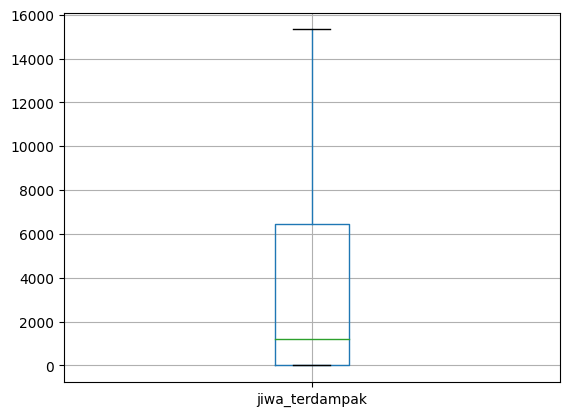

Final shape:  (62, 16)


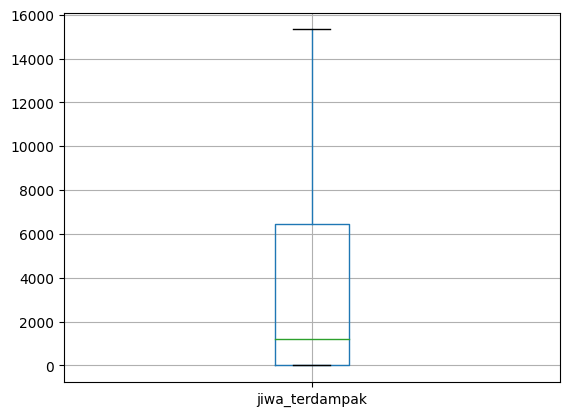

In [50]:
# Outliers Handling
# Q1, Q3, dan IQR untuk kolom jiwa terdampak
Q1 = data_rekap["jiwa_terdampak"].quantile(0.25)
Q3 = data_rekap["jiwa_terdampak"].quantile(0.75)
IQR = Q3 - Q1

# Sebelum outlier dihapus
print("Initial shape: ", data_rekap.shape)
data_rekap.boxplot(column=["jiwa_terdampak"], return_type="axes")
plt.show()

# Menghilangkan outliers
data_rekap = data_rekap[~((data_rekap["jiwa_terdampak"] < (Q1 - 1.5*IQR)) | (data_rekap["jiwa_terdampak"] > (Q3 + 1.5*IQR)))]

# Setelah outlier dihapus
print("Final shape: ", data_rekap.shape)
data_rekap.boxplot(column=["jiwa_terdampak"], return_type='axes')
plt.show()

In [10]:
# Deskripsi statistik
data_rekap.describe()

,tahun,bulan,kecamatan,kelurahan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,71.0,71.000000,71.000000,71.0
mean,2017.521127,6.422535,11.126761,24.154930,68.760563,3307.911765,11352.492537,0.577465,0.0,0.014085,0.0,1888.422535,16.873239,0.0
std,1.722616,3.437865,9.751087,32.050696,113.043919,8602.252764,30565.241050,2.516585,0.0,0.118678,0.0,6850.383815,53.053862,0.0
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,2016.000000,3.500000,4.000000,5.000000,13.000000,47.500000,337.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,2018.000000,6.000000,10.000000,15.000000,30.000000,423.000000,2131.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,2019.000000,9.000000,16.000000,31.000000,79.000000,2986.000000,9269.000000,0.000000,0.0,0.000000,0.0,402.500000,6.500000,0.0
max,2020.000000,12.000000,42.000000,167.000000,615.000000,64458.000000,231566.000000,19.000000,0.0,1.000000,0.0,41202.000000,337.000000,0.0


In [12]:
# Korelasi antarvariabel dataset
print('Correlation between kecamatan and rw_terdampak')
print(data_rekap[['kecamatan', 'rw_terdampak']].corr())
print()

print('Correlation between kecamatan and kk_terdampak')
print(data_rekap[['kecamatan', 'kk_terdampak']].corr())

Correlation between kecamatan and rw_terdampak
              kecamatan  rw_terdampak
kecamatan      1.000000      0.868917
rw_terdampak   0.868917      1.000000

Correlation between kecamatan and kk_terdampak
              kecamatan  kk_terdampak
kecamatan      1.000000      0.520076
kk_terdampak   0.520076      1.000000


In [13]:
print('Correlation between jumlah_pengungsi_tertinggi and korban_luka_berat') # Mobilitas
print(data_rekap[['jumlah_jiwa_pengungsi_tertinggi', 'korban_meninggal']].corr())

Correlation between jumlah_pengungsi_tertinggi and korban_luka_berat
                                 jumlah_jiwa_pengungsi_tertinggi  \
jumlah_jiwa_pengungsi_tertinggi                         1.000000   
korban_meninggal                                        0.495158   

                                 korban_meninggal  
jumlah_jiwa_pengungsi_tertinggi          0.495158  
korban_meninggal                         1.000000  


In [14]:
print('Correlation between jumlah_tempat_pengungsian and kecamatan') # Mobilitas
print(data_rekap[['jumlah_tempat_pengungsian', 'kecamatan']].corr())
print()

print('Correlation between jumlah_tempat_pengungsian and korban_meninggal') # Mobilitas
print(data_rekap[['jumlah_tempat_pengungsian', 'korban_meninggal']].corr())
print()

print('Correlation between jumlah_jiwa_pengungsi_tertinggi and korban_luka_berat') # Mobilitas
print(data_rekap[['jumlah_tempat_pengungsian', 'korban_luka_berat']].corr())

Correlation between jumlah_tempat_pengungsian and kecamatan
                           jumlah_tempat_pengungsian  kecamatan
jumlah_tempat_pengungsian                   1.000000   0.541726
kecamatan                                   0.541726   1.000000

Correlation between jumlah_tempat_pengungsian and korban_meninggal
                           jumlah_tempat_pengungsian  korban_meninggal
jumlah_tempat_pengungsian                   1.000000          0.497532
korban_meninggal                            0.497532          1.000000

Correlation between jumlah_jiwa_pengungsi_tertinggi and korban_luka_berat
                           jumlah_tempat_pengungsian  korban_luka_berat
jumlah_tempat_pengungsian                    1.00000            0.52802
korban_luka_berat                            0.52802            1.00000


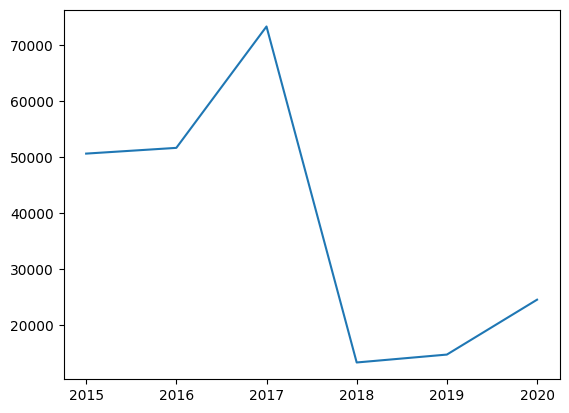

In [58]:
# Jumlah Jiwa Terdampak Banjir Tiap Tahun 2015-2020
year = [2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(year, data_rekap.groupby("tahun")["jiwa_terdampak"].sum())

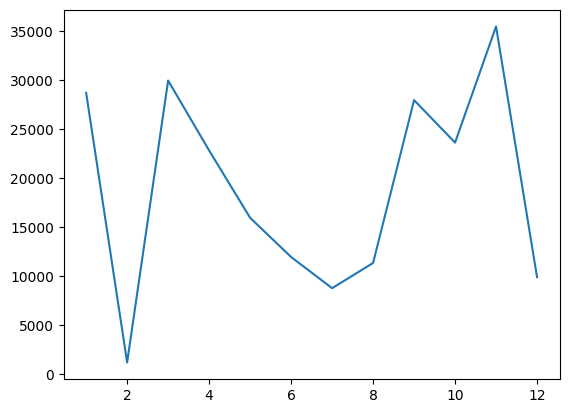

In [63]:
# Jumlah Jiwa Terdampak Banjir Tiap Bulan 2015-2020
months = [i for i in range (1,13)]
plt.plot(months, data_rekap.groupby("bulan")["jiwa_terdampak"].sum())

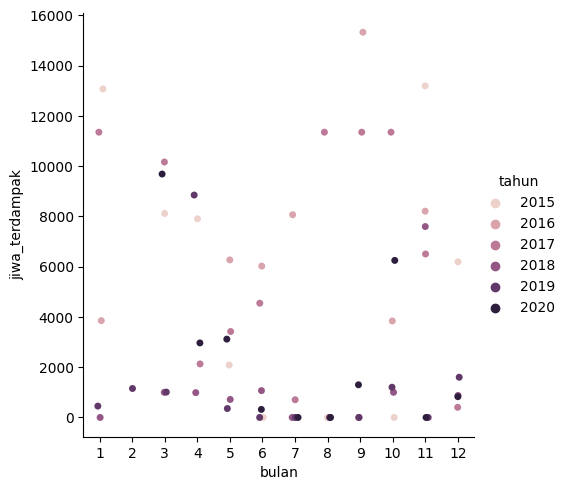

In [51]:
# Scatterplot Jiwa Terdampak Banjir Tiap Bulan Tahun 2015-2020
sns.catplot(data=data_rekap, x="bulan", y="jiwa_terdampak", hue="tahun")

In [164]:
# Membuat dataframe jiwa terdampak per tahun dari dataset
# Inisialisasi list data_jiwa
data_jiwa = [[0 for a in range(len(data_rekap))] for b in range(6)]

# Indeks iterasi untuk proses copy dari dataset ke list
index = 2015
i = 0
j = 0

# Copy value jiwa_terdampak dari dataset ke list data_jiwa
while j < len(data_rekap):
  # Cek kesamaan index dengan value tahun pada row dataset. Pindah ke index list selanjutnya jika value tahun berbeda.
  # Hasilnya masing-masing index pada list akan mengandung values yang berasal dari tahun yang sama.
  if index < data_rekap.iloc[j, 0]:
    i += 1
    index += 1
  data_jiwa[i][j] = data_rekap.iloc[j, 8]
  j += 1

# Inisialisasi dataframe dan transpose datafrae
jiwa_terdampak_per_year = pd.DataFrame(data_jiwa).T
jiwa_terdampak_per_year.columns = ["2015", "2016", "2017", "2018", "2019", "2020"]
jiwa_terdampak_per_year.head(10)

,2015,2016,2017,2018,2019,2020
0,13073.0,0.0,0.0,0.0,0.0,0.0
1,8119.0,0.0,0.0,0.0,0.0,0.0
2,7905.0,0.0,0.0,0.0,0.0,0.0
3,2088.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,13195.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# Cetak 5 data pertama pada dataset
data_rekap.head()

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian,jumlah_nilai_kerugian
0,2015,1,15,36,10-150,2,221,6095.0,13073.0,0,0,0,0,3255,59,0.0
2,2015,3,12,15,10-200,4,30,2869.0,8119.0,0,0,0,0,822,5,0.0
3,2015,4,4,6,20-100,3,18,2235.0,7905.0,0,0,0,0,0,0,0.0
4,2015,5,1,1,20-100,1,7,423.0,2088.0,0,0,0,0,0,0,0.0
5,2015,6,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0
6,2015,7,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0
7,2015,8,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0
8,2015,9,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0
9,2015,10,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0
10,2015,11,7,11,20-300,4,36,3858.0,13195.0,0,0,0,0,534,8,0.0


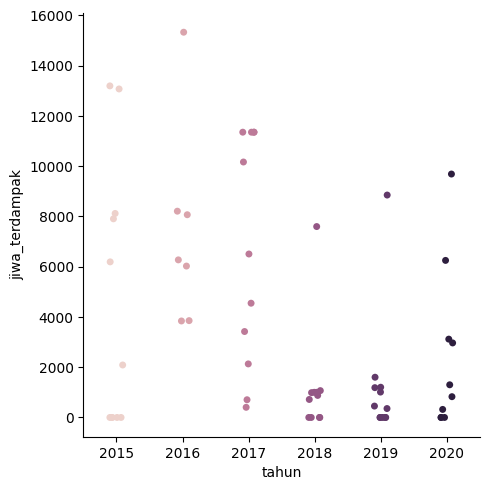

In [46]:
sns.catplot(data=data_rekap, x="tahun", y="jiwa_terdampak", hue="tahun")

In [ ]:
# Data normalization using Min-Max scaler
import numpy as np
from sklearn import preprocessing

array = data_rekap.values

# Separate features from dataset
X = array[:,2:5]
# Separate classes from dataset
Y = array[:,0:1]

dataset = pd.DataFrame({"Customer ID":array[:,0],"Gender":array[:,1],"Age":array[:,2],"Income":array[:,3],"Spending Score":array[:,4]})
print("Unnormalized dataset :")
print(dataset.head(10))

# Initiate Min-Max scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
# Min-Max scaler transformation for feature
data = min_max_scaler.fit_transform(X)
dataset = pd.DataFrame({"Age":data[:,0],"Income":data[:,1],"Spending Score":data[:,2],"Customer ID":array[:,0],"Gender":array[:,1]})

print("Normalized dataset :")
print(dataset.head(10))